# Compare Atomic Files


This notebook shows how to compare atomic files generated by Carsus.

In [1]:
import os
import logging
from carsus.io import AtomDataCompare

 ChiantiPy version 0.8.4 
 found PyQt5 widgets
 using PyQt5 widgets


In [2]:
ATOM1_PATH = os.environ.get("ATOM1_PATH", None)
ATOM2_PATH = os.environ.get("ATOM2_PATH", None)

In [3]:
path = "/home/atharva/workspace/code/tardis-main/carsus/kurucz_cd23_chianti_He_cmfgen_H_Si_I-II.h5"
path2 = "/home/atharva/workspace/code/tardis-main/refdata/atom_data/kurucz_cd23_chianti_H_He.h5"
atc = AtomDataCompare(path, path2)
atc.setup()
atc.set_keys_as_attributes()
atc.compare()

A brief overview of what keys match can be seen using the comparison table.

In [4]:
atc.comparison_table_stylized

,exists_1,exists_2,match
atom_data,True,True,False
collision_data_temperatures,False,True,False
collisions,True,True,False
collisions_metadata,True,False,False
ionization_data,True,True,False
levels,True,True,False
lines,True,True,False
macro_atom_data,True,True,False
macro_atom_references,True,True,False
metadata,True,False,False


One can investigate further into the difference between the dataframes using the `key_diff` method.

In [5]:
atc.key_diff("levels")

total_rows  not_matches_energy  not_matches_g  \
atomic_number ion_number                                                  
1             0                   25                  24             24   
              1                    1                   0              0   
2             0                   49                   0              0   
              1                   25                   0              0   
              2                    1                   0              0   
...                              ...                 ...            ...   
30            26                   1                   0              0   
              27                   1                   0              0   
              28                   1                   0              0   
              29                   1                   0              0   
              30                   1                   0              0   

                          not_matches_metastable  
atomic_number ion_number                          
1             0                                1  
              1                                0  
2             0                                0  
              1                                0  
              2                                0  
...                                          ...  
30            26                               0  
              27                               0  
              28                               0  
              29                               0  
              30                               0  

[495 rows x 4 columns]

In [6]:
atc.key_diff("lines")

[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:220: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1 = df1.loc[parsed_ion]
 (warnings.py:110)
[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:221: PerformanceWarning: indexing past lexsort depth may impact performance.
  df2 = df2.loc[parsed_ion]
 (warnings.py:110)


total_rows  not_matches_line_id  \
atomic_number ion_number                                    
1             0                   72                   72   
2             0                  174                  174   
              1                   67                   67   
3             0                  370                  187   
              1                  135                   47   
...                              ...                  ...   
29            0                  253                  253   
              1                 1640                 1639   
30            0                   98                   98   
              1                    6                    6   
              2                  427                  426   

                          not_matches_wavelength  not_matches_f_ul  \
atomic_number ion_number                                             
1             0                               72                72   
2             0                              171                 0   
              1                               61                 0   
3             0                               40                50   
              1                                0                 0   
...                                          ...               ...   
29            0                                0                 0   
              1                              555               555   
30            0                                0                 0   
              1                                0                 0   
              2                              240               240   

                          not_matches_f_lu  not_matches_nu  not_matches_B_lu  \
atomic_number ion_number                                                       
1             0                         72              72                72   
2             0                          0             171               171   
              1                          0              61                61   
3             0                         50              40                50   
              1                          0               0                 0   
...                                    ...             ...               ...   
29            0                          0               0                 0   
              1                        555             555               555   
30            0                          0               0                 0   
              1                          0               0                 0   
              2                        240             240               240   

                          not_matches_B_ul  not_matches_A_ul  
atomic_number ion_number                                      
1             0                         72                72  
2             0                        171               171  
              1                         61                61  
3             0                         50                50  
              1                          0                 0  
...                                    ...               ...  
29            0                          0                 0  
              1                        555               555  
30            0                          0                 0  
              1                          0                 0  
              2                        240               240  

[176 rows x 9 columns]

One can also investigate specific ions:

In [7]:
atc.ion_diff("lines","He", simplify_output=True)

[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:220: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1 = df1.loc[parsed_ion]
 (warnings.py:110)
[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:221: PerformanceWarning: indexing past lexsort depth may impact performance.
  df2 = df2.loc[parsed_ion]
 (warnings.py:110)


matches_line_id  matches_wavelength  \
level_number_lower level_number_upper                                        
0                  6                             False               False   
                   16                            False               False   
                   30                            False               False   
                   48                            False               False   
1                  3                             False                True   
...                                                ...                 ...   
28                 46                            False               False   
29                 39                            False               False   
                   47                            False               False   
30                 32                            False               False   
                   39                            False               False   

                                       pct_change_wavelength  matches_f_ul  \
level_number_lower level_number_upper                                        
0                  6                                0.000002          True   
                   16                               0.000002          True   
                   30                               0.000002          True   
                   48                               0.000002          True   
1                  3                                0.000000          True   
...                                                      ...           ...   
28                 46                               0.000002          True   
29                 39                               0.000002          True   
                   47                               0.000002          True   
30                 32                               0.000002          True   
                   39                               0.000002          True   

                                       pct_change_f_ul  matches_f_lu  \
level_number_lower level_number_upper                                  
0                  6                               0.0          True   
                   16                              0.0          True   
                   30                              0.0          True   
                   48                              0.0          True   
1                  3                               0.0          True   
...                                                ...           ...   
28                 46                              0.0          True   
29                 39                              0.0          True   
                   47                              0.0          True   
30                 32                              0.0          True   
                   39                              0.0          True   

                                       pct_change_f_lu  matches_nu  \
level_number_lower level_number_upper                                
0                  6                               0.0       False   
                   16                              0.0       False   
                   30                              0.0       False   
                   48                              0.0       False   
1                  3                               0.0        True   
...                                                ...         ...   
28                 46                              0.0       False   
29                 39                              0.0       False   
                   47                              0.0       False   
30                 32                              0.0       False   
                   39                              0.0       False   

                                       pct_change_nu  matches_B_lu  \
level_number_lower level_number_upper                                
0                  6 

These complex dataframes can be represented in smaller formats:

In [8]:
atc.ion_diff("lines","He",return_summary=True,)

[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:220: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1 = df1.loc[parsed_ion]
 (warnings.py:110)
[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:221: PerformanceWarning: indexing past lexsort depth may impact performance.
  df2 = df2.loc[parsed_ion]
 (warnings.py:110)


,total_rows,matches_line_id,matches_wavelength,matches_f_ul,matches_f_lu,matches_nu,matches_B_lu,matches_B_ul,matches_A_ul
values,174,0,3,174,174,3,3,3,3


Specific columns can be plotted:

[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:220: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1 = df1.loc[parsed_ion]
 (warnings.py:110)
[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:221: PerformanceWarning: indexing past lexsort depth may impact performance.
  df2 = df2.loc[parsed_ion]
 (warnings.py:110)


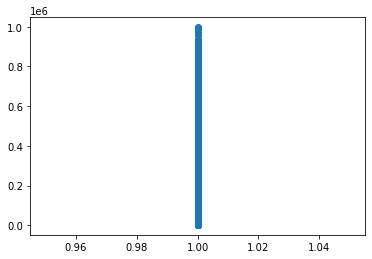

In [9]:
atc.plot_ion_diff(key_name="lines", ion="Fe", column="wavelength")

The dataframes are available as attributes as well:

In [10]:
atc.lines1

line_id  \
atomic_number ion_number level_number_lower level_number_upper            
3             0          22                 66                     1824   
                         29                 66                     1925   
                         37                 66                     2000   
                         38                 66                     2002   
                         44                 66                     2050   
...                                                                 ...   
14            1          98                 123                  559035   
                         101                123                  559110   
                         112                123                  559397   
                         114                123                  559445   
                         122                123                  559630   

                                                                  wavelength  \
atomic_number ion_number level_number_lower level_number_upper                 
3             0          22                 66                  1.640482e+04   
                         29                 66                  2.759203e+04   
                         37                 66                  4.382390e+04   
                         38                 66                  4.382397e+04   
                         44                 66                  6.790941e+04   
...                                                                      ...   
14            1          98                 123                 5.446845e+04   
                         101                123                 5.580668e+04   
                         112                123                 1.290000e+05   
                         114                123                 1.312000e+05   
                         122                123                 1.008000e+07   

                                                                    f_ul  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          22                 66                  0.000458   
                         29                 66                  0.001227   
                         37                 66                  0.000276   
                         38                 66                  0.002517   
                         44                 66                  0.000619   
...                                                                  ...   
14            1          98                 123                 0.036944   
                         101                123                 0.131156   
                         112                123                 0.348292   
                         114                123                 2.015917   
                         122                123                 0.014347   

                                                                    f_lu  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          22                 66                  0.000305   
                         29                 66                  0.000818   
                         37                 66                  0.000276   
                         38                 66                  0.001678   
                         44                 66                  0.000619   
...                                                                  ...   
14            1          98                 123                 0.380000   
                         101                123                 0.295100   
                         112                123                 1.929000   
                         114                123                 2.846000   
                         122                123                 0.079460   

                                                                     

In [11]:
atc.lines2

line_id  \
atomic_number ion_number level_number_lower level_number_upper            
3             0          21                 67                     1823   
                         28                 67                     1923   
                         37                 67                     2001   
                         44                 67                     2052   
                         51                 67                     2107   
...                                                                 ...   
2             1          11                 21                   533410   
                         13                 21                   533412   
                                            22                   533413   
                         14                 23                   533414   
                         15                 24                   533415   

                                                                   wavelength  \
atomic_number ion_number level_number_lower level_number_upper                  
3             0          21                 67                   16404.775425   
                         28                 67                   27591.968635   
                         37                 67                   43823.900517   
                         44                 67                   67909.408678   
                         51                 67                  105557.600728   
...                                                                       ...   
2             1          11                 21                   10126.280000   
                         13                 21                   10126.505000   
                                            22                   10126.440000   
                         14                 23                   10126.440000   
                         15                 24                   10126.537000   

                                                                    f_ul  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          21                 67                  0.000503   
                         28                 67                  0.001349   
                         37                 67                  0.002767   
                         44                 67                  0.006208   
                         51                 67                  0.011721   
...                                                                  ...   
2             1          11                 21                  0.593500   
                         13                 21                  0.042400   
                                            22                  0.636000   
                         14                 23                  1.009500   
                         15                 24                  1.047000   

                                                                    f_lu  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          21                 67                  0.000252   
                         28                 67                  0.000674   
                         37                 67                  0.001383   
                         44                 67                  0.003104   
                         51                 67                  0.005861   
...                                                                  ...   
2             1          11                 21                  0.890250   
                         13                 21                  0.042400   
                                            22                  0.848000   
                         14                 23                  1.346000   
                         15                 24                  1.308750   

                                                        

Finally, open HDF files can be closed.

In [12]:
atc.teardown()